Proyecto final LC
José Javier Calvo Moratilla
MUIARFID

Librerias

In [ ]:
!pip install nltk
!pip install sklearn-pycrfsuite
import nltk
nltk.download('cess_esp')
nltk.download('punkt')
from nltk.corpus import cess_esp
from nltk.tag import hmm, tnt, brill, brill_trainer, crf, perceptron
from nltk.tag import UnigramTagger, BigramTagger, AffixTagger

from tqdm import tqdm
import numpy as np
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt



     |████████████████████████████████| 485 kB 7.8 MB/s 
  Created wheel for sklearn-pycrfsuite: filename=sklearn_pycrfsuite-0.4.0-py2.py3-none-any.whl size=11001 sha256=10a111bbd7b5667c6271ce0c96440c4ba9efefa0cf22afa595794ec11cd1c55e
  Stored in directory: /root/.cache/pip/wheels/44/50/b1/295e502c6652f551dc99bfdb394a3fe2fcb47668e333391f38
  Created wheel for python-crfsuite-extension: filename=python_crfsuite_extension-0.9.7-cp37-cp37m-linux_x86_64.whl size=776811 sha256=82451fae2630d12f8fa86a164d2354aba6a5a6b9cf2d205618c95ffefe4641de
  Stored in directory: /root/.cache/pip/wheels/70/d7/bf/369f4d179407dbf3840132e4135fa61f0bf711f4496d0bf750
Successfully built sklearn-pycrfsuite python-crfsuite-extension
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tarea 1: Evaluación del etiquetador ‘hmm’ sobre el corpus ‘cess-esp’ utilizando el juego de
categorías completo y reducido.

Utilizando el etiquetador hmm basado en modelos de Markov, se realizará una validación cruzada
sobre 10 particiones del corpus. Barajar el corpus antes de realizar las particiones. Presentar los
resultados en forma de tabla y gráficamente, incluyendo los intervalos de confianza.


 Se inicia la ejecución de la tarea nº1...

 Se utiliza el corpus sin la reducción de categorias...  


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


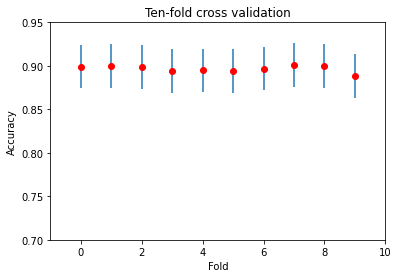


--------------------------------------------------------

Resultados en no reducción de categorias:
[0.8990910968808098, 0.9000678744844149, 0.8989409347173192, 0.8938532786022524, 0.8947148527261333, 0.894260440238634, 0.8969287347182189, 0.9008719596145021, 0.8996155264128087, 0.8885827814569537]
[0.024041635396261255, 0.023937985973797992, 0.024057507640297005, 0.024585770665899793, 0.024497586128069807, 0.024544160023785042, 0.024268625939796118, 0.023852132346428367, 0.023986073458056128, 0.025114383297153986]

--------------------------------------------------------

 Se utiliza el corpus con la reducción de categorias...  

 Se preprocesa el corpus...



100%|██████████| 6030/6030 [00:07<00:00, 860.16it/s] 



Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


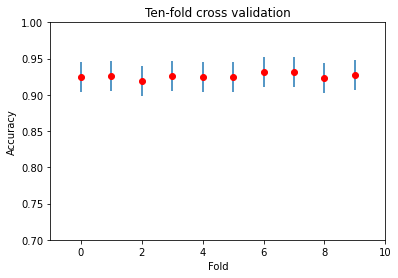


--------------------------------------------------------

Resultados en reducción de categorias:
Resultados:
[0.9242579324462641, 0.9263467796084913, 0.9191422594142259, 0.9254481044784011, 0.9240486341386389, 0.9246394789889906, 0.931385981257193, 0.9317510548523207, 0.9237711009661322, 0.9268490923868871]
[0.021118476591004905, 0.020848752971632405, 0.021759533641835995, 0.02096538275167286, 0.021145240262336214, 0.02106956540510252, 0.020177562078256054, 0.020127754816626868, 0.021180656879759396, 0.020783169963695405]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1a.Download the dirty corpus 
corpus=cess_esp.tagged_sents()

# Vars
corpus_cleaned = []
corpus_train = []
corpus_test = []

results = []
intervalos_conf = []


def preproces():
    """
    The corpus is preprocessed to simplify the labels
    """
    # 1b.Preprocess corpus
    for sentence in tqdm(corpus):
        list_cleaned = []
        for word, cat in sentence:    

            if not word.startswith('*0*'): 

                if cat.startswith('v') | cat.startswith('F'):       
                    list_cleaned.append((word, cat[0:3]))        
                elif len(cat) == 1:
                    list_cleaned.append((word, cat[0:1]))            
                else:        
                    list_cleaned.append((word, cat[0:2]))   

        corpus_cleaned.append(list_cleaned) 
   

# 2a.Entrenamiento etiquetador hmm 
def train(train_data):
    """
    Training of the selected model is performed   
    """         
    
    model_trained = hmm.HiddenMarkovModelTagger.train(train_data)   
    return model_trained

# 2c.Evaluar las prestaciones del etiquetador

print('\n Se inicia la ejecución de la tarea nº1...\n')

print(' Se utiliza el corpus sin la reducción de categorias...  \n')
print('\n Se realiza el Ten-fold cross validation... \n')
iter = 1
splits = 10
kf = KFold(n_splits=splits, shuffle = True)
for train_indexes, test_indexes in kf.split(corpus):
  print('Iteración: ', iter, ' de: ', splits)

  train_data = np.array(corpus)[train_indexes.astype(int)]
  test_data = np.array(corpus)[test_indexes.astype(int)]

  model = train(train_data)
  ac = model.evaluate(test_data)  
  ic = 1.96 * np.sqrt((ac*(1-ac))/len(test_data))
  results.append(ac)
  intervalos_conf.append(ic)
  iter += 1

x=[i for i in range(10)]
y=results
plt.axis([-1, 10, 0.70, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()

print('\n--------------------------------------------------------\n')
print('Resultados en no reducción de categorias:')
print(results)
print(intervalos_conf)

results = []
intervalos_conf = []

print('\n--------------------------------------------------------\n')
print(' Se utiliza el corpus con la reducción de categorias...  \n')
print(' Se preprocesa el corpus...\n')
preproces()
print('\nSe realiza el Ten-fold cross validation... \n')
iter = 1;
splits = 10;
kf = KFold(n_splits=splits, shuffle = True)
for train_indexes, test_indexes in kf.split(corpus_cleaned):
  print('Iteración: ', iter, ' de: ', splits)

  train_data = np.array(corpus_cleaned)[train_indexes.astype(int)]
  test_data = np.array(corpus_cleaned)[test_indexes.astype(int)]

  model = train(train_data)
  ac = model.evaluate(test_data)  
  ic = 1.96 * np.sqrt((ac*(1-ac))/len(test_data))
  results.append(ac)
  intervalos_conf.append(ic)
  iter += 1


x=[i for i in range(10)]
y=results
plt.axis([-1, 10, 0.70, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()

print('\n--------------------------------------------------------\n')
print('Resultados en reducción de categorias:')
print('Resultados:')
print(results)
print(intervalos_conf)



Tarea 2: Evaluación de las prestaciones del etiquetador respecto a la cantidad de datos de
aprendizaje.
Se trata de estudiar cómo varían las prestaciones del etiquetador hmm cuando varía el tamaño del
corpus de aprendizaje. Para este experimento se dividirá el corpus de entrenamiento en 10 partes
de tamaño similar. La partición 10 se tomará como test, y las 9 particiones restantes se tomarán
como entrenamiento. En cada ejecución, se irá incrementando sucesivamente el tamaño del corpus
de entrenamiento, manteniendo fija la partición de test.
Importante: Para esta tarea no es necesario realizar la validación cruzada. 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1a.Download the dirty corpus 
corpus=cess_esp.tagged_sents()
# Vars
corpus_cleaned = []
corpus_train = []
corpus_test = []
index_part = []

results = []
intervalos_conf = []

def preproces():
    """
    The corpus is preprocessed to simplify the labels
    """
    # 1b.Preprocess corpus
    for sentence in tqdm(corpus):
        list_cleaned = []
        for word, cat in sentence:    

            if not word.startswith('*0*'): 

                if cat.startswith('v') | cat.startswith('F'):       
                    list_cleaned.append((word, cat[0:3]))        
                elif len(cat) == 1:
                    list_cleaned.append((word, cat[0:1]))            
                else:        
                    list_cleaned.append((word, cat[0:2]))   

        corpus_cleaned.append(list_cleaned) 

def holdout(valor):
    """
    The data are divided into training and test segments.
    """
    reference = int(len(corpus_cleaned)*valor)    
    corpus_train = corpus_cleaned[:reference]
    corpus_test = corpus_cleaned[reference:]
    return corpus_train, corpus_test

def get_index_part(corpus_train):
  """
  Return the index when each partition starts
  """
  long_train = len(corpus_train)
  res = []
  for x in range(0,long_train, int(long_train / 9)):
    res.append(x)
  res.append(long_train)
  return res[1:]

def train(train_data):
    """
    Training of the selected model is performed   
    """         
    
    model_trained = hmm.HiddenMarkovModelTagger.train(train_data)   
    return model_trained

print('Tarea2 \n')
print('--------------------------------------------------------\n')
print('Preproces...\n')
# Reduces the categories in corpus 
preproces()

print('\nHoldout...\n')
# Doing general holdout
corpus_train, corpus_test = holdout(0.9)

print('Obtain indexes...\n')
#Obtain indexes
index_part = get_index_part(corpus_train)

print('Experiment...\n')
# Iterate every index and train model with this subset
for idx in tqdm(index_part):  
  particion_train = corpus_train[0:idx]
  model = train(particion_train)
  ac = model.evaluate(test_data)  
  ic = 1.96 * np.sqrt((ac*(1-ac))/len(test_data))
  results.append(ac)
  intervalos_conf.append(ic)

print('\nResults:\n')
print(results)
print('\nInterval Confidence:\n')
print(intervalos_conf)




Tarea2 

--------------------------------------------------------

Preproces...



100%|██████████| 6030/6030 [00:07<00:00, 851.38it/s] 



Holdout...

Obtain indexes...

Experiment...



100%|██████████| 9/9 [01:29<00:00,  9.95s/it]


Results:

[0.7404347178800059, 0.7955188328122674, 0.8081732916480572, 0.819562304600268, 0.8295369956825964, 0.8575256811076374, 0.8675748101831174, 0.8733809736489504, 0.8784427571832664]

Interval Confidence:

[0.03499162439837008, 0.03219209982326431, 0.03142709218901664, 0.030693897504747353, 0.03001444824936088, 0.02789904115871331, 0.027054292697050945, 0.026542923994298338, 0.026082220904978973]


Tarea 3: Evaluación del método de suavizado para palabras desconocidas para el etiquetador tnt.
El etiquetador tnt por defecto no incorpora un método de suavizado para las palabras desconocidas.
Utiliza un método basado en los sufijos de las palabras para construir un modelo para las palabras
desconocidas (Affix Tagger). En base al sufijo de la palabra desconocida le asigna una categoría
morfosintáctica. Este método funciona razonablemente bien para el inglés.
En concreto, se trata de estudiar diferentes longitudes del sufijo (número de letras que se tienen en
cuenta) y estudiar cómo varían las prestaciones del etiquetador. Una vez se haya decidido el sufijo
que mejores prestaciones proporciona, incorporarlo como modelo de suavizado al etiquetador tnt y
comprobar si aumenta sus prestaciones.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1a.Download the dirty corpus 
corpus=cess_esp.tagged_sents()
# Vars
corpus_cleaned = []
corpus_train = []
corpus_test = []

results = []
intervalos_conf = []

best_ac = 0.0
best_sufix = 0

def preproces():
    """
    The corpus is preprocessed to simplify the labels
    """
    # 1b.Preprocess corpus
    for sentence in tqdm(corpus):
        list_cleaned = []
        for word, cat in sentence:    

            if not word.startswith('*0*'): 

                if cat.startswith('v') | cat.startswith('F'):       
                    list_cleaned.append((word, cat[0:3]))        
                elif len(cat) == 1:
                    list_cleaned.append((word, cat[0:1]))            
                else:        
                    list_cleaned.append((word, cat[0:2]))   

        corpus_cleaned.append(list_cleaned) 

def holdout(valor):
    """
    The data are divided into training and test segments.
    """
    reference = int(len(corpus_cleaned)*valor)    
    corpus_train = corpus_cleaned[:reference]
    corpus_test = corpus_cleaned[reference:]
    return corpus_train, corpus_test

print('Tarea 3 \n')
print('--------------------------------------------------------\n')
print('Preproces...\n')
# Reduces the categories in corpus 
preproces()

print('\nHoldout...\n')
# Doing general holdout
corpus_train, corpus_test = holdout(0.9)

print('Experiments TnT Without smoothed ...\n')

model_trained = tnt.TnT()
model_trained.train(corpus_train)
ac = model_trained.evaluate(corpus_test)
ic = 1.96 * np.sqrt((ac*(1-ac))/len(corpus_test))

print('\nAccurancy: ', ac, '\n')
print('\nConfidence Interval: ', ic, '\n')

print('Experiments what number of sufix is the best...\n')
for longitud in range(1,10):
  # initializing tagger
  print('Sufix of : ', longitud, '\n')
  unk = AffixTagger(corpus_train, affix_length=-longitud)  
  ac = unk.evaluate(corpus_test) 
  ic = 1.96 * np.sqrt((ac*(1-ac))/len(corpus_test))
  results.append(ac)
  intervalos_conf.append(ic)

  if ac > best_ac:
    best_ac = ac
    best_sufix = longitud

print('\n The best sufix is: ', best_sufix, ' with accurancy of: ', best_ac)
print('--------------------------------------------------------\n')
print('\nResults: \n')
print(results)
print('\nConfidence Interval: \n')
print(intervalos_conf)

print('--------------------------------------------------------\n')
print('Uses : ', best_sufix, ' to train model TnT \n')
 
unk = AffixTagger(corpus_train, affix_length=-best_sufix)
model_trained = tnt.TnT(N=100, unk=unk, Trained=True)
model_trained.train(corpus_train)
ac = model_trained.evaluate(corpus_test)
ic = 1.96 * np.sqrt((ac*(1-ac))/len(corpus_test))

print('\nAccurancy: ', ac, '\n')
print('\nConfident Interval: ', ic, '\n')



Tarea 3 

--------------------------------------------------------

Preproces...



100%|██████████| 6030/6030 [00:06<00:00, 877.55it/s] 



Holdout...

Experiments TnT Without smoothed ...


Accurancy:  0.8255173440524044 


Confidence Interval:  0.030292606824607833 

Experiments what number of sufix is the best...

Sufix of :  1 

Sufix of :  2 

Sufix of :  3 

Sufix of :  4 

Sufix of :  5 

Sufix of :  6 

Sufix of :  7 

Sufix of :  8 

Sufix of :  9 


 The best sufix is:  3  with accurancy of:  0.2675301473872264
--------------------------------------------------------


Results: 

[0.21974095578383207, 0.2622450498734554, 0.2675301473872264, 0.21505136221527468, 0.15929730534464792, 0.09773708500818817, 0.05292541313086199, 0.030891767157957422, 0.01652523447967843]

Confidence Interval: 

[0.033050065580443135, 0.03510808417778935, 0.035332848962060424, 0.03279360296203619, 0.029209414367536782, 0.023702472969941282, 0.017869879964678793, 0.013810357886326705, 0.010175431641782038]
--------------------------------------------------------

Uses :  3  to train model TnT 


Accurancy:  0.9136519279440226 


Confide

Tarea 4: Evaluación del resto de etiquetadores.
Se deberán utilizar otros paradigmas de etiquetado. Como mínimo el etiquetador de Brill y algún otro
como, CRF, perceptron. Se deberá realizar una comparativa de prestaciones respecto a los
etiquetadores tnt y hmm, utilizando el juego de categorías reducido.
Cuando se utilice el etiquetador de Brill, probar con diferentes etiquetados iniciales, por ejemplo
probar con Unigram Tagger y con hmm tagger.
La comparación puede ser sólo de una partición, si el coste temporal de la validación cruzada
requiere mucho tiempo.


Tarea 4 

--------------------------------------------------------

Preproces...



100%|██████████| 6030/6030 [00:06<00:00, 864.02it/s] 



 HMM 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


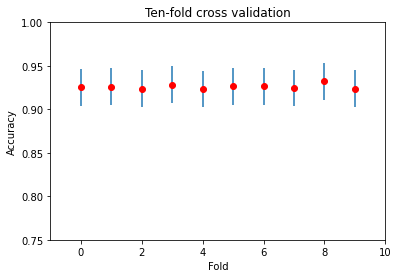

Resultados:  [0.9254547423126894, 0.9259317585301837, 0.9235678953247167, 0.9285303798129669, 0.9234222339582783, 0.9265648365733817, 0.926458157227388, 0.9245617696160268, 0.9322945243059366, 0.9236491373075731]
Confidence Intervals:  [0.02096452457380333, 0.0209027257376881, 0.021206536215626817, 0.020561567091501455, 0.021225059934893917, 0.02082031785548852, 0.020834235746410683, 0.02107953989050412, 0.02005330128983524, 0.02119619489046944]

 TnT 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


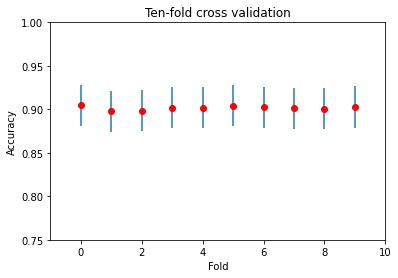

Resultados:  [0.9045253267091479, 0.897561231998318, 0.8986482876529358, 0.9019158259451747, 0.9017606394469648, 0.9042240201744247, 0.9022650351470971, 0.9009718225745155, 0.9008233127505145, 0.9026452282157676]
Confidence Intervals:  [0.02345588758443715, 0.02420257817855477, 0.024088393447779802, 0.02373995485474207, 0.023756683745285327, 0.02348895722058742, 0.023702243734331503, 0.023841436153863423, 0.023857340147506248, 0.023661080991098305]

 crf 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


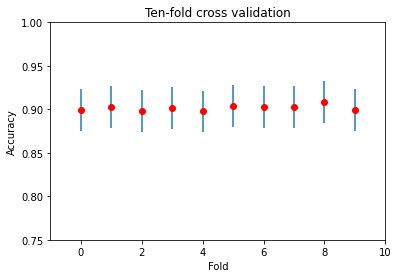

Resultados:  [0.8988546539764478, 0.9025018790937399, 0.897602242059373, 0.901316833254006, 0.8975237501946737, 0.9037421928305254, 0.9025549924238466, 0.9031032298923369, 0.9087601006046985, 0.898869655436029]
Confidence Intervals:  [0.02406662013849714, 0.023676614086050343, 0.024198285893521555, 0.023804424981685588, 0.024206500128515725, 0.0235416921656646, 0.023670860639237366, 0.023611346981632367, 0.022983408684452554, 0.024065036156042503]

 perceptron 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


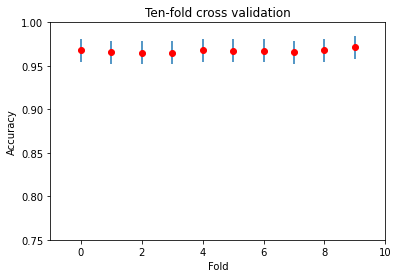

Resultados:  [0.9680407124681933, 0.9656980554948656, 0.9650562469431009, 0.9648840707505576, 0.967711616077846, 0.9673821548821548, 0.9672328194408153, 0.9657345206478154, 0.96785413153457, 0.9713691618682022]
Confidence Intervals:  [0.014039213258648759, 0.014527051084671843, 0.014657452729247502, 0.014692207939719143, 0.014108912713276162, 0.014178297482349674, 0.01420962001862604, 0.014519601566193576, 0.014078777683835858, 0.01331087490545885]

 brill Unigram 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


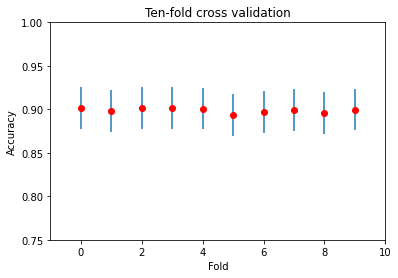

Resultados:  [0.9013498372725818, 0.8977327804405192, 0.9013448203404076, 0.9018995714058945, 0.9009146341463414, 0.8931608697866272, 0.8972115333930737, 0.8993501429685469, 0.8960459183673469, 0.8997929838303587]
Confidence Intervals:  [0.02380087977521198, 0.024184615177726215, 0.02380141873393993, 0.023741707927320624, 0.0238475624454884, 0.024656273064004117, 0.02423913027204553, 0.02401421532628575, 0.024360338640365825, 0.023967226587173738]

 brill HMM_Tagger 


 Se realiza el Ten-fold cross validation... 

Iteración:  1  de:  10
Iteración:  2  de:  10
Iteración:  3  de:  10
Iteración:  4  de:  10
Iteración:  5  de:  10
Iteración:  6  de:  10
Iteración:  7  de:  10
Iteración:  8  de:  10
Iteración:  9  de:  10
Iteración:  10  de:  10


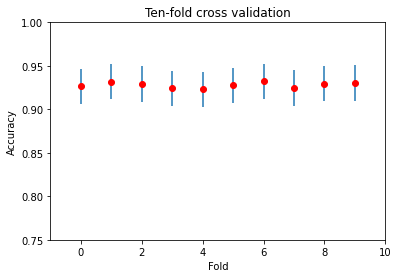

Resultados:  [0.9263770903456751, 0.9318181818181818, 0.9290551435020961, 0.9240260789913249, 0.9229094562911689, 0.9274481772694781, 0.9323354208034215, 0.9246016743181205, 0.929518855656697, 0.9301509674675739]
Confidence Intervals:  [0.020844803574497667, 0.0201185786204444, 0.020491729700048714, 0.021148121654719902, 0.02129009099154162, 0.02070457905007325, 0.020047683620415042, 0.021074418689419422, 0.02042974710658811, 0.02034484258519494]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# 1a.Download the dirty corpus 
corpus=cess_esp.tagged_sents()
# Vars
corpus_cleaned = []

results = []
intervalos_conf = []

def preproces():
    """
    The corpus is preprocessed to simplify the labels
    """
    # 1b.Preprocess corpus
    for sentence in tqdm(corpus):
        list_cleaned = []
        for word, cat in sentence:    

            if not word.startswith('*0*'): 

                if cat.startswith('v') | cat.startswith('F'):       
                    list_cleaned.append((word, cat[0:3]))        
                elif len(cat) == 1:
                    list_cleaned.append((word, cat[0:1]))            
                else:        
                    list_cleaned.append((word, cat[0:2]))   

        corpus_cleaned.append(list_cleaned) 

def train_brill_tagger(initial_tagger, train_sents, **kwargs):
    templates = [
            brill.Template(brill.Pos([-1])),
            brill.Template(brill.Pos([1])),
            brill.Template(brill.Pos([-2])),
            brill.Template(brill.Pos([2])),
            brill.Template(brill.Pos([-2, -1])),
            brill.Template(brill.Pos([1, 2])),
            brill.Template(brill.Pos([-3, -2, -1])),
            brill.Template(brill.Pos([1, 2, 3])),
            brill.Template(brill.Pos([-1]), brill.Pos([1])),
            brill.Template(brill.Word([-1])),
            brill.Template(brill.Word([1])),
            brill.Template(brill.Word([-2])),
            brill.Template(brill.Word([2])),
            brill.Template(brill.Word([-2, -1])),
            brill.Template(brill.Word([1, 2])),
            brill.Template(brill.Word([-3, -2, -1])),
            brill.Template(brill.Word([1, 2, 3])),
            brill.Template(brill.Word([-1]), brill.Word([1])),
            ]
      
    # Using BrillTaggerTrainer to train 
    trainer = brill_trainer.BrillTaggerTrainer(
            initial_tagger, templates, deterministic = True)
      
    return trainer.train(train_sents, **kwargs)

def kfoldcross(model_selec, pre_tag = 'hmm_tagger'):
  print('\n Se realiza el Ten-fold cross validation... \n')
  iter = 1;
  splits = 10;
  results = []
  intervalos_conf = []

  kf = KFold(n_splits=splits, shuffle = True)
  for train_indexes, test_indexes in kf.split(corpus_cleaned):
    print('Iteración: ', iter, ' de: ', splits)

    train_data = np.array(corpus_cleaned)[train_indexes.astype(int)]
    test_data = np.array(corpus_cleaned)[test_indexes.astype(int)]

    model = train(train_data, model_selec, pre_tag)
    ac = model.evaluate(test_data)  
    ic = 1.96 * np.sqrt((ac*(1-ac))/len(test_data))
    results.append(ac)
    intervalos_conf.append(ic)
    iter += 1

  x=[i for i in range(splits)]
  y=results
  plt.axis([-1, 10, 0.75, 1.0])
  plt.ylabel('Accuracy')
  plt.xlabel('Fold')
  plt.title('Ten-fold cross validation')
  plt.plot(x,y,'ro')
  plt.errorbar(x,y,yerr=ic,linestyle='None')
  plt.show()
  print('Resultados: ',results)
  print('Confidence Intervals: ', intervalos_conf)

def train(tr_data, model = 'hmm', pre_etiquetado ='unigram'):
    """
    Training of the selected model is performed
    """     
    if model =='hmm':
        model_trained = hmm.HiddenMarkovModelTagger.train(tr_data)

    elif model == 'tnt':
        model_trained = tnt.TnT()
        model_trained.train(tr_data)
    elif model == 'brill':
        if pre_etiquetado == 'unigram':
            tagger = UnigramTagger(tr_data.tolist())       
        elif pre_etiquetado == 'hmm_tagger':
            tagger = hmm.HiddenMarkovModelTagger.train(tr_data)          
        model_trained = train_brill_tagger(tagger, tr_data)
        #model_trained.train(tr_data)
    elif model == 'crf':
        model_trained = crf.CRFTagger()
        model_trained.train(tr_data, 'model.crf.tagger')
    elif model == 'perceptron':
        model_trained = perceptron.PerceptronTagger(load=False)
        model_trained.train(tr_data)
    else:
        raise ValueError("El modelo seleccionado no existe")
    return model_trained


print('Tarea 4 \n')
print('--------------------------------------------------------\n')
print('Preproces...\n')
# Reduces the categories in corpus 
preproces()

print('\n HMM \n')
kfoldcross('hmm')
print('\n TnT \n')
kfoldcross('tnt')
print('\n crf \n')
kfoldcross('tnt')
print('\n perceptron \n')
kfoldcross('perceptron')
print('\n brill Unigram \n')
kfoldcross('brill', 'unigram')
print('\n brill HMM_Tagger \n')
kfoldcross('brill', 'hmm_tagger')




Tarea 5: Evaluación del paquete Freeling
Realizar un estudio de la herramienta Freeling. Considerar diferentes aspectos: facilidad/problemas
de instalación, facilidad de uso, documentación, funcionalidad, etc. Esta herramienta de libre
distribución se puede obtener en la siguiente dirección http://nlp.lsi.upc.edu/freeling/
Usar Freeling para realizar el etiquetado morfosintáctico del texto del fichero Alicia.txt. Se debe
entregar un fichero tipo texto con el formato: palabra/etiqueta


Ploteo Tarea1


In [ ]:
results_round = []
intervals_round = []

results_no_reduc = [0.8990910968808098, 0.9000678744844149, 0.8989409347173192, 0.8938532786022524, 0.8947148527261333, 0.894260440238634, 0.8969287347182189, 0.9008719596145021, 0.8996155264128087, 0.8885827814569537]
ic_no_reduc = [0.024041635396261255, 0.023937985973797992, 0.024057507640297005, 0.024585770665899793, 0.024497586128069807, 0.024544160023785042, 0.024268625939796118, 0.023852132346428367, 0.023986073458056128, 0.025114383297153986]

results_round.append([round(i,4) for i in results_no_reduc])
intervals_round.append([round(i,4) for i in ic_no_reduc])

print('Resultados sin reduc cat: ', results_round)
print('Intervalos sin reduc cat: ', intervals_round)

results_round = []
intervals_round = []

results_si_reduc = [0.9242579324462641, 0.9263467796084913, 0.9191422594142259, 0.9254481044784011, 0.9240486341386389, 0.9246394789889906, 0.931385981257193, 0.9317510548523207, 0.9237711009661322, 0.9268490923868871]
ic_si_reduc = [0.021118476591004905, 0.020848752971632405, 0.021759533641835995, 0.02096538275167286, 0.021145240262336214, 0.02106956540510252, 0.020177562078256054, 0.020127754816626868, 0.021180656879759396, 0.020783169963695405]

results_round.append([round(i,4) for i in results_si_reduc])
intervals_round.append([round(i,4) for i in ic_si_reduc])

print('Resultados con reduc cat: ', results_round )
print('Intervalos con reduc cat: ', intervals_round)


Resultados sin reduc cat:  [[0.8991, 0.9001, 0.8989, 0.8939, 0.8947, 0.8943, 0.8969, 0.9009, 0.8996, 0.8886]]
Intervalos sin reduc cat:  [[0.024, 0.0239, 0.0241, 0.0246, 0.0245, 0.0245, 0.0243, 0.0239, 0.024, 0.0251]]
Resultados con reduc cat:  [[0.9243, 0.9263, 0.9191, 0.9254, 0.924, 0.9246, 0.9314, 0.9318, 0.9238, 0.9268]]
Intervalos con reduc cat:  [[0.0211, 0.0208, 0.0218, 0.021, 0.0211, 0.0211, 0.0202, 0.0201, 0.0212, 0.0208]]


Ploteo Tarea2


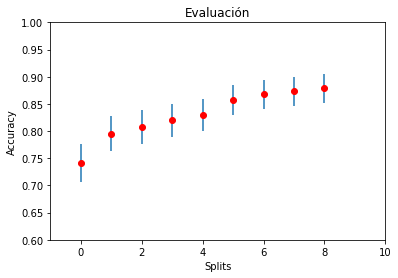

[[0.7404, 0.7955, 0.8082, 0.8196, 0.8295, 0.8575, 0.8676, 0.8734, 0.8784]]
[[0.035, 0.0322, 0.0314, 0.0307, 0.03, 0.0279, 0.0271, 0.0265, 0.0261]]


In [ ]:
results_round = []
intervals_round = []

splits = 9

results = [0.7404347178800059, 0.7955188328122674, 0.8081732916480572, 0.819562304600268, 0.8295369956825964, 0.8575256811076374, 0.8675748101831174, 0.8733809736489504, 0.8784427571832664]
results_round.append([round(i,4) for i in results])

print()

ic = [0.03499162439837008, 0.03219209982326431, 0.03142709218901664, 0.030693897504747353, 0.03001444824936088, 0.02789904115871331, 0.027054292697050945, 0.026542923994298338, 0.026082220904978973]
intervals_round.append([round(i,4) for i in ic])

x=[i for i in range(splits)]
y=results
plt.axis([-1, 10, 0.6, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Splits')
plt.title('Evaluación')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()

print(results_round)
print(intervals_round)


Ploteo Tarea3

The best sufix is:  3  with accurancy of:  0.2675301473872264
--------------------------------------------------------
Results: 

[0.21974095578383207, 0.2622450498734554, 0.2675301473872264, 0.21505136221527468, 0.15929730534464792, 0.09773708500818817, 0.05292541313086199, 0.030891767157957422, 0.01652523447967843]

Confidence Interval: 

[0.033050065580443135, 0.03510808417778935, 0.035332848962060424, 0.03279360296203619, 0.029209414367536782, 0.023702472969941282, 0.017869879964678793, 0.013810357886326705, 0.010175431641782038]
--------------------------------------------------------

Se utiliza:  3  para entrenar el modelo TnT 


La Accurancy es de:  0.9136519279440226 


El intervalo de confianza es de:  0.022418890997800676 

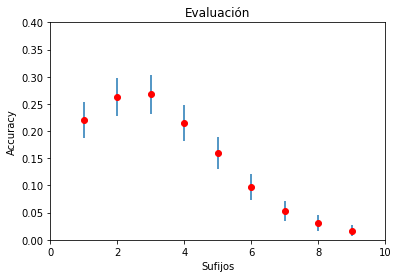

0.2675
[[0.2197, 0.2622, 0.2675, 0.2151, 0.1593, 0.0977, 0.0529, 0.0309, 0.0165]]
[[0.0331, 0.0351, 0.0353, 0.0328, 0.0292, 0.0237, 0.0179, 0.0138, 0.0102]]
0.9137
0.0224


In [ ]:
splits = 10

best_sufi = round(0.2675301473872264, 4)

acu_tnt = round(0.9136519279440226, 4)
ic_tnt = round(0.022418890997800676, 4)



results = [0.21974095578383207, 0.2622450498734554, 0.2675301473872264, 0.21505136221527468, 0.15929730534464792, 0.09773708500818817, 0.05292541313086199, 0.030891767157957422, 0.01652523447967843]
ic = [0.033050065580443135, 0.03510808417778935, 0.035332848962060424, 0.03279360296203619, 0.029209414367536782, 0.023702472969941282, 0.017869879964678793, 0.013810357886326705, 0.010175431641782038]

results_round = []
intervals_round = []

results_round.append([round(i,4) for i in results])
intervals_round.append([round(i,4) for i in ic])


x=[i for i in range(1,splits)]
y=results
plt.axis([0, 10, 0.00, 0.4])
plt.ylabel('Accuracy')
plt.xlabel('Sufijos')
plt.title('Evaluación')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=ic,linestyle='None')
plt.show()

print(best_sufi)
print(results_round)
print(intervals_round)

print(acu_tnt)
print(ic_tnt)


Ploteo Tarea 4

---



In [ ]:
results_round = []
intervals_round = []

results = [0.9263770903456751, 0.9318181818181818, 0.9290551435020961, 0.9240260789913249, 0.9229094562911689, 0.9274481772694781, 0.9323354208034215, 0.9246016743181205, 0.929518855656697, 0.9301509674675739]
ic = [0.020844803574497667, 0.0201185786204444, 0.020491729700048714, 0.021148121654719902, 0.02129009099154162, 0.02070457905007325, 0.020047683620415042, 0.021074418689419422, 0.02042974710658811, 0.02034484258519494]
results_round.append([round(i,4) for i in results])
intervals_round.append([round(i,4) for i in ic])

print(results_round)
print(intervals_round)




[[0.9264, 0.9318, 0.9291, 0.924, 0.9229, 0.9274, 0.9323, 0.9246, 0.9295, 0.9302]]
[[0.0208, 0.0201, 0.0205, 0.0211, 0.0213, 0.0207, 0.02, 0.0211, 0.0204, 0.0203]]


In [ ]:
print('hmm')
print(max([0.9255, 0.9259, 0.9236, 0.9285, 0.9234, 0.9266, 0.9265, 0.9246, 0.9323, 0.9236]))
print('['+str(round(0.9323-0.0201, 4))+'-'+str(round(0.9323+0.0201, 4))+']')
print('tnt')
print(max( [0.9045, 0.8976, 0.8986, 0.9019, 0.9018, 0.9042, 0.9023, 0.901, 0.9008, 0.9026]))
print('['+str(round(0.9045-0.0235, 4))+'-'+str(round(0.9045+0.0235, 4))+']')
print('crf')
print(max( [0.8989, 0.9025, 0.8976, 0.9013, 0.8975, 0.9037, 0.9026, 0.9031, 0.9088, 0.8989]))
print('['+str(round(0.9088-0.023, 4))+'-'+str(round(0.9088+0.023, 4))+']')
print('perceptron')
print(max([0.968, 0.9657, 0.9651, 0.9649, 0.9677, 0.9674, 0.9672, 0.9657, 0.9679, 0.9714] ))
print('['+str(round(0.9714-0.0133, 4))+'-'+str(round(0.9714+0.0133, 4))+']')
print('Brill Unitag')
print(max( [0.9013, 0.8977, 0.9013, 0.9019, 0.9009, 0.8932, 0.8972, 0.8994, 0.896, 0.8998]))
print('['+str(round(0.9019-0.0237, 4))+'-'+str(round(0.9019+0.0237, 4))+']')
print('Brill hmm tagger')
print(max( [0.9264, 0.9318, 0.9291, 0.924, 0.9229, 0.9274, 0.9323, 0.9246, 0.9295, 0.9302]))
print('['+str(round(0.9323-0.02, 4))+'-'+str(round(0.9323+0.02, 4))+']')

hmm
0.9323
[0.9122-0.9524]
tnt
0.9045
[0.881-0.928]
crf
0.9088
[0.8858-0.9318]
perceptron
0.9714
[0.9581-0.9847]
Brill Unitag
0.9019
[0.8782-0.9256]
Brill hmm tagger
0.9323
[0.9123-0.9523]
